In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [7]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df = pd.merge(df,movie_titles,on='item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
#EDA

In [12]:
sns.set_style('white')

In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending= False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending= False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [17]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
ratings['num_of_rating'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [24]:
ratings = ratings.sort_values(by='num_of_rating',ascending=False)

In [25]:
ratings

,rating,num_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


<AxesSubplot:>

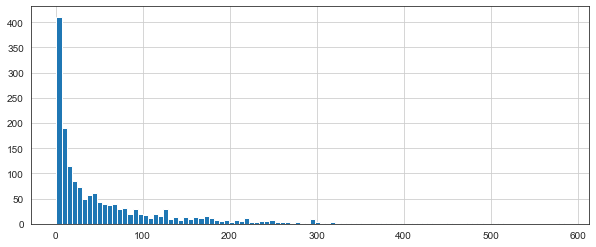

In [28]:
plt.figure(figsize=(10,4))
ratings['num_of_rating'].hist(bins=100)

<AxesSubplot:>

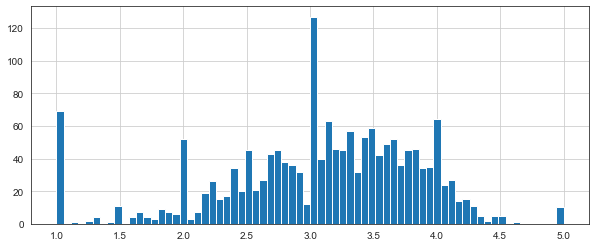

In [30]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

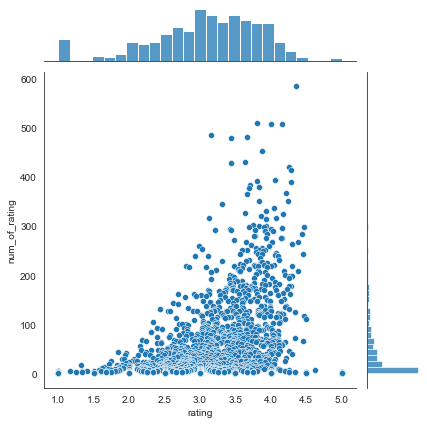

In [32]:
sns.jointplot(y='num_of_rating',x='rating',data=ratings)

In [33]:
#CREATING PIVOT TABLE i.e MATRIX

In [34]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [35]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
ratings

,rating,num_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [37]:
#Lets chose Star wars and Liar Liar

In [38]:
starwars_user_rating = moviemat['Star Wars (1977)']

In [41]:
starwars_user_rating

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [45]:
similar_to_starwars = moviemat.corrwith(starwars_user_rating)

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [53]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [54]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [57]:
corr_starwars.sort_values(by='Correlation',ascending=False)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [58]:
#As we see that some movies have correlation of value 1 and -1 this is due to the fact that these movie has been rated highly by ver few no.of viewers(1 or users)
#So we need to take only those mvoies that have been rated more taht 100 time by different users

In [59]:
corr_starwars = corr_starwars.join(ratings['num_of_rating'])

In [60]:
corr_starwars


,Correlation,num_of_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [62]:
corr_starwars[corr_starwars['num_of_rating'] > 100].sort_values('Correlation',ascending=False)

,Correlation,num_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [63]:
#Hence after star war the above movies will be recoomended

In [64]:
#Lets see what will be the movies that are reccomended to us  if we watch Liar Liar

In [65]:
liarliar_user_rating = moviemat['Liar Liar (1997)']

In [66]:
liarliar_user_rating

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [67]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_rating)

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [68]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [69]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [71]:
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
...,...
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016
Zeus and Roxanne (1997),-0.500000


In [72]:
corr_liarliar.dropna()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [73]:
corr_liarliar = corr_liarliar.join(ratings['num_of_rating'])

In [75]:
corr_liarliar = corr_liarliar[corr_liarliar['num_of_rating'] > 100]

In [76]:
corr_liarliar.sort_values(by='Correlation',ascending=False)

,Correlation,num_of_rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
